In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [9]:
data = pd.read_csv("data/diff_preprocessed.csv")
data = data[data["winner"] != 0.5]
m = len(data)


test, cv, train = data.iloc[:round(0.1*m)], data.iloc[round(0.1*m): round(0.2*m)], data.iloc[round(0.2*m):]
x_cols = data.columns.drop(["winner"])
X_train, y_train = train[x_cols].values, train["winner"].values
X_test, y_test = test[x_cols].values, test["winner"].values
X_cv, y_cv = cv[x_cols].values, cv["winner"].values

In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_cv_scaled = scaler.transform(X_cv)
X_test_scaled = scaler.transform(X_test)

In [11]:
model = LogisticRegression(C= 10.0)
model.fit(X_train_scaled, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,10.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [12]:
model.score(X_cv_scaled,y_cv)

0.6151012891344383

Max f1 score = 0.6276923076923077
threshold for max f1 score = 0.7147147147147147
Max acc score = 0.6224677716390423
threshold for max acc score = 0.47347347347347346


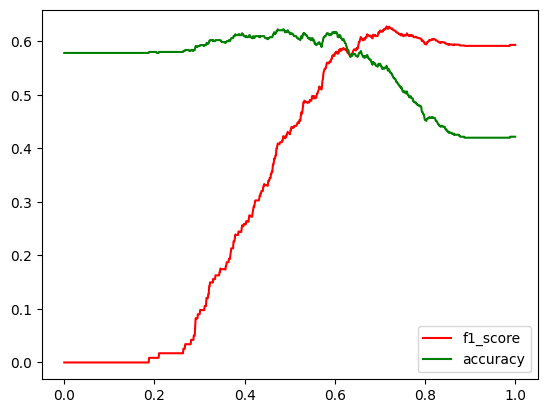

In [13]:
result = model.predict_proba(X_cv_scaled)[:,1]
result=result.flatten()
thresholds = np.linspace(0,1, num=1000)
f1_values = []
acc_values = []
max_f1 = 0
best_thresh_f1 = 0
max_acc = 0
best_thresh_acc = 0

for thresh in thresholds:
    ypred = np.where(result > thresh, 1, 0)
    f1 = f1_score(y_cv, ypred,pos_label= 0)
    acc = accuracy_score(y_cv,ypred)
    if f1 > max_f1:
        max_f1 = f1
        best_thresh_f1 = thresh
    if acc > max_acc:
        max_acc = acc
        best_thresh_acc = thresh
    f1_values.append(f1)
    acc_values.append(acc)

plt.plot(thresholds, np.array(f1_values),color= "r", label= "f1_score")
plt.plot(thresholds, np.array(acc_values),color= "g", label= "accuracy")
plt.legend()

print(f"Max f1 score = {max_f1}")
print(f"threshold for max f1 score = {best_thresh_f1}")
print(f"Max acc score = {max_acc}")
print(f"threshold for max acc score = {best_thresh_acc}")

In [14]:
accuracy_score(y_test, np.where(model.predict_proba(X_test_scaled)[:,1].flatten() > 0.6, 1,0))

0.6605166051660517